SMA(Simple Moving Average)

50-day SMA: 19.80811982896846
200-day SMA: 19.824738989845002
50-day SMA <= 200-day SMA, so SMA predicts Bearish trend.




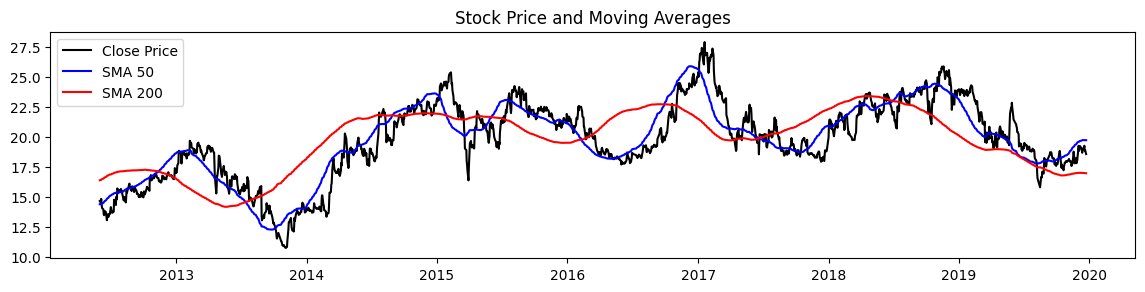



RSI(Relative Strength Index)

14-day RSI: 49.92801522011715
30 <= RSI <= 70, so RSI predicts Neutral trend.




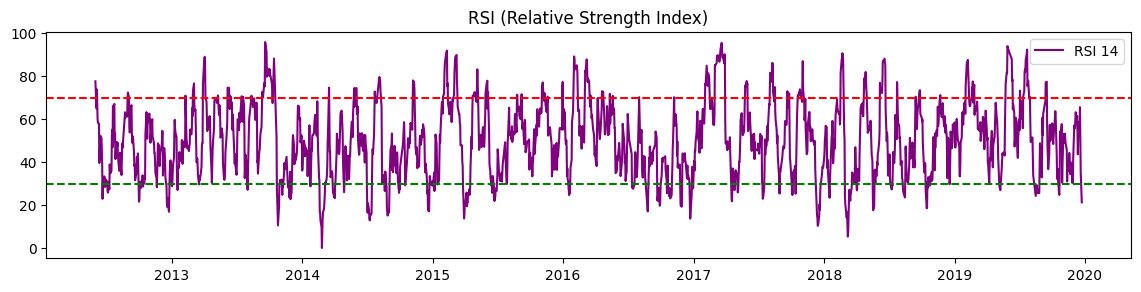



MACD(Moving Average Convergence And Divergence)

MACD Line: -0.020706504897587907
Signal Line: -0.02100886418283636
MACD Line > Signal Line, so MACD predicts Bullish trend.
MACD Histogram: 0.00030235928524846226
MACD Histogram > 0, so MACD predicts Bullish trend.




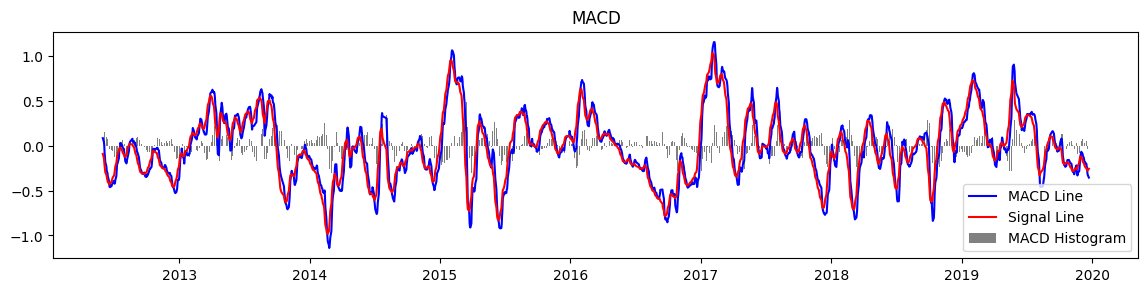



Overall Trend

Overall Trend: Bullish


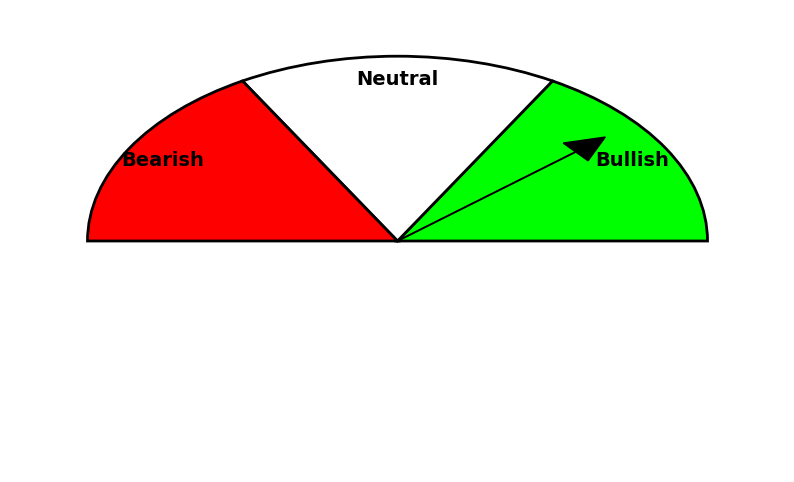

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Load the data (replace with your actual CSV file)
data = pd.read_csv('akbl(AskariBankLtd).csv')

# Ensure the 'TIME' column is in datetime format, specifying the format
try:
    data['TIME'] = pd.to_datetime(data['TIME'], format='%y-%m-%d')
except ValueError:
    data['TIME'] = pd.to_datetime(data['TIME'], errors='coerce')

# Calculate Simple Moving Average (SMA)
def calculate_sma(data, window):
    return data['CLOSE'].rolling(window=window).mean()

# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, window):
    return data['CLOSE'].ewm(span=window, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data['CLOSE'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD
def calculate_macd(data, fast_window=12, slow_window=26, signal_window=9):
    ema_fast = calculate_ema(data, fast_window)
    ema_slow = calculate_ema(data, slow_window)
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    macd_histogram = macd_line - signal_line
    return macd_line, signal_line, macd_histogram

# Add SMA, RSI, and MACD to DataFrame
data['SMA_50'] = calculate_sma(data, 50)
data['SMA_200'] = calculate_sma(data, 200)
data['RSI_14'] = calculate_rsi(data, 14)
data['MACD_Line'], data['Signal_Line'], data['MACD_Histogram'] = calculate_macd(data)

# Drop rows with NaN values that resulted from rolling calculations
data = data.dropna()

# Calculate the averages of the relevant metrics
average_sma_50 = data['SMA_50'].mean()
average_sma_200 = data['SMA_200'].mean()
average_rsi_14 = data['RSI_14'].mean()
average_macd_line = data['MACD_Line'].mean()
average_signal_line = data['Signal_Line'].mean()
average_macd_histogram = data['MACD_Histogram'].mean()

# Print the calculated averages and trends
print('\033[1mSMA(Simple Moving Average)\033[0m\n')
print(f"50-day SMA: {average_sma_50}")
print(f"200-day SMA: {average_sma_200}")
if average_sma_50 > average_sma_200:
    print("50-day SMA > 200-day SMA, so SMA predicts Bullish trend.")
else:
    print("50-day SMA <= 200-day SMA, so SMA predicts Bearish trend.")

print('\n')

# Plot SMA
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(data['TIME'], data['CLOSE'], label='Close Price', color='black')
plt.plot(data['TIME'], data['SMA_50'], label='SMA 50', color='blue')
plt.plot(data['TIME'], data['SMA_200'], label='SMA 200', color='red')
plt.title('Stock Price and Moving Averages')
plt.legend()
plt.show()

print('\n')

# Print RSI and trends
print('\033[1mRSI(Relative Strength Index)\033[0m\n')
print(f"14-day RSI: {average_rsi_14}")
if average_rsi_14 < 30:
    print("RSI < 30, so RSI predicts Bullish trend.")
elif average_rsi_14 > 70:
    print("RSI > 70, so RSI predicts Bearish trend.")
else:
    print("30 <= RSI <= 70, so RSI predicts Neutral trend.")

print('\n')

# Plot RSI
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 2)
plt.plot(data['TIME'], data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI (Relative Strength Index)')
plt.legend()
plt.show()

print('\n')

# Print MACD and trends
print('\033[1mMACD(Moving Average Convergence And Divergence)\033[0m\n')
print(f"MACD Line: {average_macd_line}")
print(f"Signal Line: {average_signal_line}")
if average_macd_line > average_signal_line:
    print("MACD Line > Signal Line, so MACD predicts Bullish trend.")
else:
    print("MACD Line <= Signal Line, so MACD predicts Bearish trend.")

print(f"MACD Histogram: {average_macd_histogram}")
if average_macd_histogram > 0:
    print("MACD Histogram > 0, so MACD predicts Bullish trend.")
elif average_macd_histogram < 0:
    print("MACD Histogram < 0, so MACD predicts Bearish trend.")
else:
    print("MACD Histogram = 0, so MACD predicts Neutral trend.")

print('\n')

# Plot MACD
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 3)
plt.plot(data['TIME'], data['MACD_Line'], label='MACD Line', color='blue')
plt.plot(data['TIME'], data['Signal_Line'], label='Signal Line', color='red')
plt.bar(data['TIME'], data['MACD_Histogram'], label='MACD Histogram', color='grey')
plt.title('MACD')
plt.legend()
plt.show()

# Assess the overall trend and provide recommendations
def provide_recommendations(average_sma_50, average_sma_200, average_rsi_14, average_macd_line, average_signal_line, average_macd_histogram):
    if average_sma_50 > average_sma_200:
        trend = "Bullish"
    elif average_macd_histogram > 0:
        trend = "Bullish"
    elif average_rsi_14 < 30:
        trend = "Bullish"
    elif average_sma_50 < average_sma_200:
        trend = "Bearish"
    elif average_rsi_14 > 70:
        trend = "Bearish"
    elif average_macd_histogram < 0:
        trend = "Bearish"
    else:
        trend = "Neutral"
    return trend

# Get the trend based on the averages
trend = provide_recommendations(average_sma_50, average_sma_200, average_rsi_14, average_macd_line, average_signal_line, average_macd_histogram)

print('\n\n\033[1mOverall Trend\033[0m\n')
print(f"Overall Trend: {trend}")

# Enhanced visualization using matplotlib
def plot_gauge(trend):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define the categories and their corresponding colors
    categories = ['Bullish', 'Neutral', 'Bearish']
    colors = ['#00FF00', '#FFFFFF', '#FF0000']  # Green, White, Red

    # Draw the gauge
    start_angle = 0
    end_angle = 180
    angles = np.linspace(start_angle, end_angle, len(categories) + 1)
    for i, (color, angle) in enumerate(zip(colors, angles[:-1])):
        ax.add_patch(Wedge((0.5, 0.5), 0.4, angles[i], angles[i+1], facecolor=color, edgecolor='k', lw=2))

    # Add text labels
    for i, angle in enumerate(angles[:-1]):
        ax.text(0.5 + 0.35 * np.cos(np.radians((angle + angles[i+1]) / 2)),
                0.5 + 0.35 * np.sin(np.radians((angle + angles[i+1]) / 2)),
                categories[i], horizontalalignment='center', verticalalignment='center', fontsize=14, weight='bold')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Determine the needle position
    if trend == "Bullish":
        needle_angle = 40
    elif trend == "Neutral":
        needle_angle = 90
    else:
        needle_angle = 160

    # Plot the needle
    ax.arrow(0.5, 0.5, 0.3 * np.cos(np.radians(needle_angle)), 0.3 * np.sin(np.radians(needle_angle)),
             head_width=0.05, head_length=0.05, fc='k', ec='k')

    plt.show()

# Plot the gauge based on the trend
plot_gauge(trend)





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving akbl(AskariBankLtd).csv to akbl(AskariBankLtd).csv
